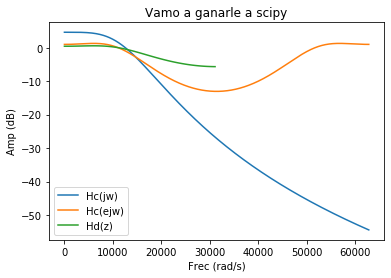

In [17]:
from scipy import signal
import numpy as np
import cmath
import matplotlib.pyplot as plt

fs = 10e3 
T = 1.0/fs
p1 = complex(0.1906746549,-0.3077282153)  # cmath.exp(T*(-9501.89-1j*9501.89))
p2 = complex(0.1906746549,0.3077282153) # cmath.exp(T*(-9501.89+1j*9501.89))
h1 = 12791.37981j
h2 = -h1


sampleCount = 500
freq = np.linspace(0,2*np.pi*fs,sampleCount)
cmpFreq = freq*1j
expjw = np.e ** (freq*1j*T)
twoOrderHS = 2.5994e8 / ( (cmpFreq-complex(-10160.74903,10160.74903)) * (cmpFreq-complex(-10160.74903,-10160.74903)))
twoOrderHZ = (h1*expjw / (expjw - p1) + h2*expjw / (expjw - p2))*T
plt.plot(freq, 20*np.log(np.abs(twoOrderHS)),label='Hc(jw)')
plt.plot(freq, 20*np.log(np.abs(twoOrderHZ)),label='Hc(ejw)')

poles_d = [p1, p2]
zeros_d = [0]
gain_d = -h1*p2*T-h2*p1*T
digital_tf = signal.ZerosPolesGain(zeros_d, poles_d, gain_d, dt=T)

w, mag, phase = digital_tf.bode()
plt.plot(w, mag, label='Hd(z)')
plt.xlabel('Frec (rad/s)')
plt.ylabel('Amp (dB)')
plt.title('Vamo a ganarle a scipy')
plt.legend()
plt.show()